In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_video = pd.read_csv("./KA_DATA/my_user_video.csv",header=None,sep= ' ')

In [3]:
user_video.sort_values(by =0)

,0,1
177797,1,664
185865,1,713
171618,1,635
206728,1,885
206781,1,886
...,...,...
78503,4721,235
92148,4722,313
102992,4722,421
91277,4722,312


##  EDA

In [4]:
user_interactions  = user_video[0].value_counts()
user_interactions_sorted = user_interactions.sort_values(ascending=False)
user_interactions_sorted

2720    848
2077    809
1133    736
2334    726
1648    720
       ... 
4015      2
1410      2
539       2
50        2
4175      2
Name: 0, Length: 4361, dtype: int64

In [6]:
sorted_user_ids = user_interactions_sorted.index
sorted_interactions = user_interactions_sorted.values
sorted_interactions

array([848, 809, 736, ...,   2,   2,   2], dtype=int64)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


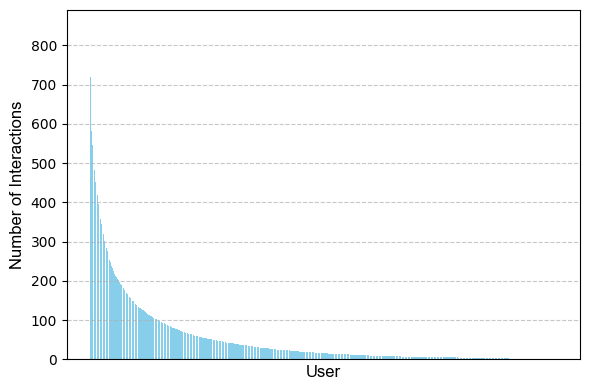

In [23]:
# 绘制柱状图

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,
}

plt.figure(figsize=(6,4), dpi=100)
plt.bar(range(len(sorted_user_ids)), sorted_interactions, color='skyblue')
plt.xlabel('User',font1)
plt.ylabel('Number of Interactions', font1)
# plt.title('Number of Interactions per User')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('mooc_user_bar.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


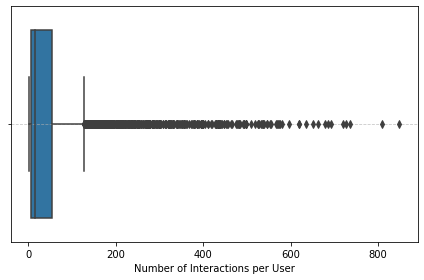

In [25]:
interactions_counts = user_interactions.values

# 绘制箱型图
plt.figure(figsize=(6, 4))
sns.boxplot(x=interactions_counts)
plt.xlabel('Number of Interactions per User')
# plt.title('Distribution of Interactions per User')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('mooc_user_box.eps', format='eps')
plt.show()

## The division of test set and training set

In [ ]:
# 打乱顺序
import random
user_video = user_video.sample(frac=1,random_state = 666).reset_index(drop=True)
user_video

In [ ]:
# Extract test set and training set
length = len(user_video[0])
len = 0
UserTrain = './KA_DATA/moocUserTrain.csv'
UserTest = './KA_DATA/moocUserTest.csv'

with open(UserTrain,'w') as object:
    for user,video in zip(user_video[0],user_video[1]):
        len+=1
        if len < int(length * 0.90):
            object.write(str(user)+" ")
            object.write(str(video)+"\n")
    len=0 
    
with open(UserTest,'w') as object:
    for user,video in zip(user_video[0],user_video[1]):
        len+=1
        if len >= int(length * 0.90):
            object.write(str(user)+" ")
            object.write(str(video)+"\n")
    len=0   

In [ ]:
# Generate Negative samples of moocUser test set
moocUserTest = pd.read_csv("./KA_DATA/moocUserTest.csv", header = None, sep=" ")
moocUserTest

In [ ]:
u_v = set()
for user,video in zip(user_video[0],user_video[1]):
    u_v.add((user,video))
    
u_v    

In [ ]:
f = open('./KA_DATA/moocUserNegative.csv','w',encoding='utf-8')
for user,video in zip(moocUserTest[0],moocUserTest[1]):
    text_p = []
    text_p.append((user,video))
    for i in str(text_p[0]):
        if i != ' ':
            f.write(i)
    for i in range(99):
        f.write(' ')
        j = np.random.randint(0, user_video[1].max() + 1)
        while (user,j) in u_v: # or j in video_vain
            j = np.random.randint(0, user_video[1].max() + 1)
        f.write(str(j))
    f.write('\n')
f.close()